# Hyperstatic Truss - Displacement method
(220_HW09_P2)

In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.Model(2,2)
n = mdl.dnodes
e = mdl.delems

A1 = 10000
Ac = 20000
I = 1
mdl.xsection('default', A1, I)
csec = mdl.xsection('section-c', Ac, I)

mdl.node('1', 0.0, 0.0)
mdl.node('2', 8.0, 0.0)
mdl.node('3', 16., 0.0)
mdl.node('4', 0.0, 6.0)
mdl.node('5', 8.0, 6.0)

mdl.truss('a', n['4'], n['5'])
mdl.truss('b', n['1'], n['5'])
mdl.truss('c', n['2'], n['5'], xsec=csec)
mdl.truss('d', n['3'], n['5'], xsec=csec)

mdl.pin(n['1'])
mdl.pin(n['4'])
mdl.pin(n['2'])
mdl.pin(n['3'])

mdl.numDOF()

# em.utilities.export.FEDEAS(mdl)

[[3, 4], [5, 6], [7, 8], [9, 10], [1, 2]]

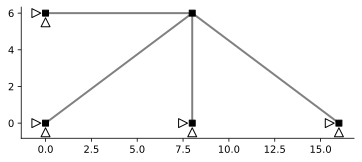

In [3]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

## Part A: Nodal loading.

### Displacements

In [4]:
n['5'].p['x'] = 50
n['5'].p['y'] = 30

In [5]:
result = em.analysis.SolveDispl(mdl)
V, Q = em.Localize(*result)
Q

super


C:\Users\claud\Anaconda3\lib\site-packages\IPython\core\formatters.py:371: FormatterWarning: text/html formatter returned invalid type <class 'ema.utilities.Structural_Vector'> (expected <class 'str'>) for object: Structural_Vector([ 21.35437359,  18.86016337,  28.85202376, -16.94686964])
  FormatterWarning


Structural_Vector([ 21.35437359,  18.86016337,  28.85202376, -16.94686964])

In [6]:

np.array([result, em.P_vector(mdl)])

array([(Displacement_vector([0.0170835 , 0.00865561]), nForce_vector([50., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])),
       nForce_vector([50., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])],
      dtype=object)

## Part B: Thermal loading

### Displacements

In [7]:
n['5'].p['x'] = 0
n['5'].p['y'] = 0
e['c'].e0['1'] = 100*2e-5

In [8]:
P0f = B.f@Q0
P0f

NameError: name 'B' is not defined

In [ ]:
Uf = K.f.inv@(-P0f)
Uf_func = em.analysis.SolveDispl(mdl)
Uf

In [ ]:
Uf_func

### Element Basic Forces

In [ ]:
V = A.f@Uf
V

In [ ]:
Q = K.s@V + Q0
Q